In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split

from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import classification_report

In [10]:
df = pd.read_csv('../datasets/cancer patient data sets.csv')

Pré-processamento dos dados

In [11]:
x = df.iloc[:, 2:25].values

In [12]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.Level)

Divisão: 70% para treino e 30% para teste

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=28)

Modelo de classificação: SVM

In [14]:
clf = svm.NuSVC(kernel="rbf", gamma=0.01, nu=0.1)
clf = clf.fit(x_train, y_train)

In [15]:
y_pred = clf.predict(x_test)

Principais Métricas

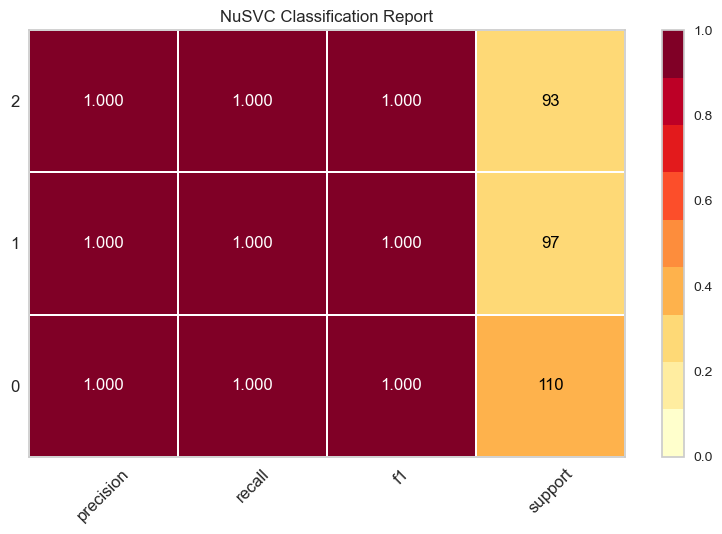

In [16]:
_ = classification_report(
    clf, 
    x_train, y_train, 
    x_test, y_test,
    support=True)

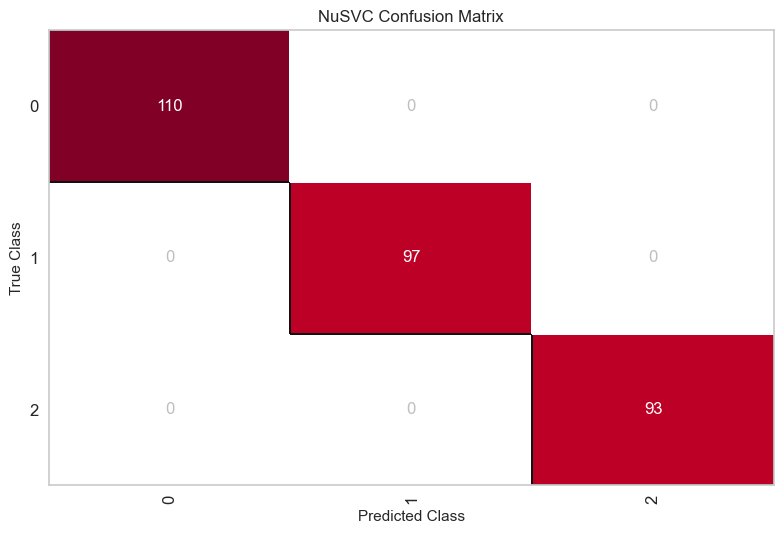

In [17]:
_ = confusion_matrix(
    clf, 
    x_train, y_train, 
    x_test, y_test
)

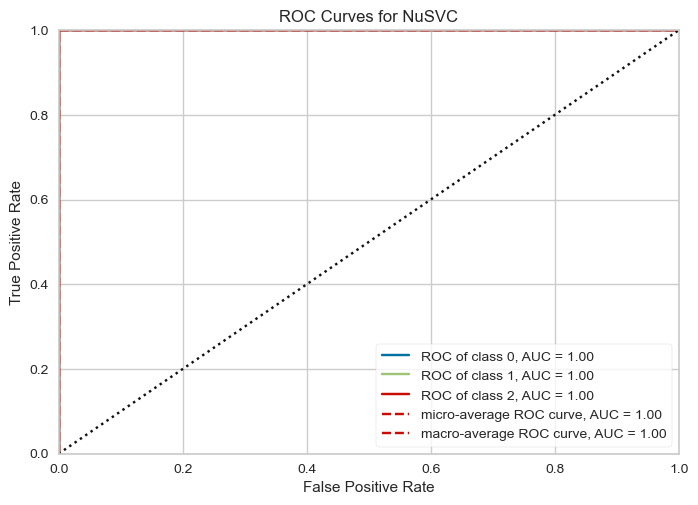

In [18]:
_ = roc_auc(
    clf, 
    x_train, y_train, 
    x_test, y_test
)

In [21]:
with open(r"../models/model.pickle", "wb") as model:
    pickle.dump(clf, model)